In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats

## Partier 1 : Chargement & Exploration initiale des données

In [3]:
df = pd.read_excel("avito_scraped_cars.xlsx")
df=pd.DataFrame(df)

In [4]:
df.head(10)

,id,list_id,title,description,price,old_price,location,ad_type,category,phone,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
0,75444387,56191250,meilleur Location de voiture,meilleur Location de voiture avec meilleurs prix,450.0,NaN,Casablanca,à louer,Voitures de location,661412363.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75007294,55835159,Mercedes-Benz Classe CLA Diesel Automatique 2025,mercedes CLA 220 DIESEL voiture toute option p...,NaN,NaN,Rabat,à vendre,Voitures d'occasion,666187046.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,75008804,55842308,Location de clio 5 a Casablanca,Location de voiture a Casablanca a bas prix et...,NaN,NaN,Casablanca,à louer,Voitures de location,661985172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75020424,55845764,KIFAL - VOLKSWAGEN Touareg,Référence Kifal : #VEH0000VMI\nKIFAL AUTO s'oc...,365000.0,NaN,Casablanca,à vendre,Voitures d'occasion,703117060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75381400,56140161,opel corsa,•avito / moteur.ma vous proposer :\n\n•opel - ...,198000.0,NaN,Casablanca,à vendre,Voitures d'occasion,777432421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75397289,56153271,Megane 3 coupé 1.9,Voiture trai bon etat toute option 1.9,79000.0,NaN,Casablanca,à vendre,Voitures d'occasion,661664461.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0
6,74273744,55274208,Fiat 500 diesel,Voiture très bon état,93000.0,NaN,Casablanca,à vendre,Voitures d'occasion,661664461.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0
7,75398276,56154037,KIFAL - MERCEDES-BENZ GLC,Référence Kifal : #VEH0000WZ3\nKIFAL AUTO s'oc...,340000.0,NaN,Casablanca,à vendre,Voitures d'occasion,703117060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,75571383,56296061,Corolla Millenium 5chevaux moteur 1.4,Je met en vente ma voiture Corolla Millenium m...,93000.0,NaN,Kénitra,à vendre,Voitures d'occasion,669926664.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
9,74961822,55799587,Chery Tiggo Diesel Automatique 2023 à Casablanca,SIARACASH s'occupe de la vente d'une Chery TI...,165000.0,NaN,Casablanca,à vendre,Voitures d'occasion,662527197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(20747, 42)

In [6]:
df.columns

Index(['id', 'list_id', 'title', 'description', 'price', 'old_price',
       'location', 'ad_type', 'category', 'phone', 'seller_name',
       'seller_type', 'seller_verified', 'type', 'sector', 'mileage', 'brand',
       'model', 'doors', 'origin', 'first_owner', 'fiscal_power', 'condition',
       'year', 'gearbox', 'fuel_type', 'abs', 'airbags', 'audio_system',
       'rear_camera', 'ac', 'esp', 'alloy_wheels', 'speed_limiter',
       'onboard_computer', 'rear_radar', 'cruise_control', 'leather_seats',
       'navigation', 'sunroof', 'central_locking', 'electric_windows'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20747 non-null  int64  
 1   list_id           20747 non-null  int64  
 2   title             20747 non-null  object 
 3   description       20746 non-null  object 
 4   price             16079 non-null  float64
 5   old_price         0 non-null      float64
 6   location          20747 non-null  object 
 7   ad_type           20747 non-null  object 
 8   category          20747 non-null  object 
 9   phone             18835 non-null  float64
 10  seller_name       20747 non-null  object 
 11  seller_type       20747 non-null  object 
 12  seller_verified   20747 non-null  bool   
 13  type              19213 non-null  object 
 14  sector            361 non-null    object 
 15  mileage           16575 non-null  object 
 16  brand             16575 non-null  object

In [8]:
df.describe()

,id,list_id,price,old_price,phone,doors,abs,airbags,audio_system,rear_camera,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
count,2.074700e+04,2.074700e+04,1.607900e+04,0.0,1.883500e+04,14593.000000,9337.000000,10376.000000,9439.000000,6359.000000,...,9202.000000,8233.000000,7652.000000,8025.000000,8311.000000,4850.000000,6513.000000,2955.000000,9805.000000,10580.000000
mean,7.477493e+07,5.568910e+07,2.172028e+05,NaN,6.684833e+08,4.892962,0.997858,0.996916,0.994597,0.973109,...,0.992719,0.993441,0.992551,0.985545,0.991216,0.952371,0.980961,0.891709,0.996940,0.997164
std,1.897024e+06,1.295442e+06,9.014157e+05,NaN,4.301822e+07,0.450147,0.046235,0.055451,0.073311,0.161778,...,0.085022,0.080726,0.085991,0.119364,0.093314,0.213002,0.136672,0.310800,0.055232,0.053177
min,2.844187e+07,2.255146e+07,1.000000e+00,NaN,5.204951e+08,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.468815e+07,5.558611e+07,5.500000e+04,NaN,6.455551e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7.505973e+07,5.587838e+07,1.180000e+05,NaN,6.625272e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.538108e+07,5.614012e+07,1.880000e+05,NaN,6.819112e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.559184e+07,5.631256e+07,5.800000e+07,NaN,8.086852e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ÉTAPE 2 : Traitement des valeurs manquantes (NaN)

In [10]:
# 1_nombre des valeurs null dans les données
print("afficher juste les valeurs manquantes dans dataFrame")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

afficher juste les valeurs manquantes dans dataFrame
description             1
price                4668
old_price           20747
phone                1912
type                 1534
sector              20386
mileage              4172
brand                4172
model                4172
doors                6154
origin               6183
first_owner          6525
fiscal_power         4195
condition            4883
year                 4149
gearbox              4195
fuel_type            4161
abs                 11410
airbags             10371
audio_system        11308
rear_camera         14388
ac                   9826
esp                 13606
alloy_wheels        11545
speed_limiter       12514
onboard_computer    13095
rear_radar          12722
cruise_control      12436
leather_seats       15897
navigation          14234
sunroof             17792
central_locking     10942
electric_windows    10167
dtype: int64


In [11]:
# Supprimer les colonnes avec trop de valeurs manquantes (ex: >50%)
threshold = len(df) * 0.7
df= df.dropna(thresh=threshold, axis=1)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
df.shape

description        1
price           4668
phone           1912
type            1534
mileage         4172
brand           4172
model           4172
doors           6154
origin          6183
fiscal_power    4195
condition       4883
year            4149
gearbox         4195
fuel_type       4161
dtype: int64


(20747, 23)

In [12]:
cols_with_missing = ['description', 'price', 'phone', 'type', 'mileage', 'brand', 
                    'model', 'doors', 'origin', 'fiscal_power', 'condition', 
                    'year', 'gearbox', 'fuel_type']
pd.set_option('display.max_columns', None) 
print(df[cols_with_missing].dtypes)
df.head()

description      object
price           float64
phone           float64
type             object
mileage          object
brand            object
model            object
doors           float64
origin           object
fiscal_power     object
condition        object
year             object
gearbox          object
fuel_type        object
dtype: object


,id,list_id,title,description,price,location,ad_type,category,phone,seller_name,seller_type,seller_verified,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,75444387,56191250,meilleur Location de voiture,meilleur Location de voiture avec meilleurs prix,450.0,Casablanca,à louer,Voitures de location,661412363.0,LOCATION DE VOITURE NATIONALE,shop,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75007294,55835159,Mercedes-Benz Classe CLA Diesel Automatique 2025,mercedes CLA 220 DIESEL voiture toute option p...,NaN,Rabat,à vendre,Voitures d'occasion,666187046.0,Marjane Auto,shop,False,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
2,75008804,55842308,Location de clio 5 a Casablanca,Location de voiture a Casablanca a bas prix et...,NaN,Casablanca,à louer,Voitures de location,661985172.0,vog car,shop,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75020424,55845764,KIFAL - VOLKSWAGEN Touareg,Référence Kifal : #VEH0000VMI\nKIFAL AUTO s'oc...,365000.0,Casablanca,à vendre,Voitures d'occasion,703117060.0,KIFAL AUTO,shop,False,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
4,75381400,56140161,opel corsa,•avito / moteur.ma vous proposer :\n\n•opel - ...,198000.0,Casablanca,à vendre,Voitures d'occasion,777432421.0,Voitures particuliers certifiées,shop,True,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel


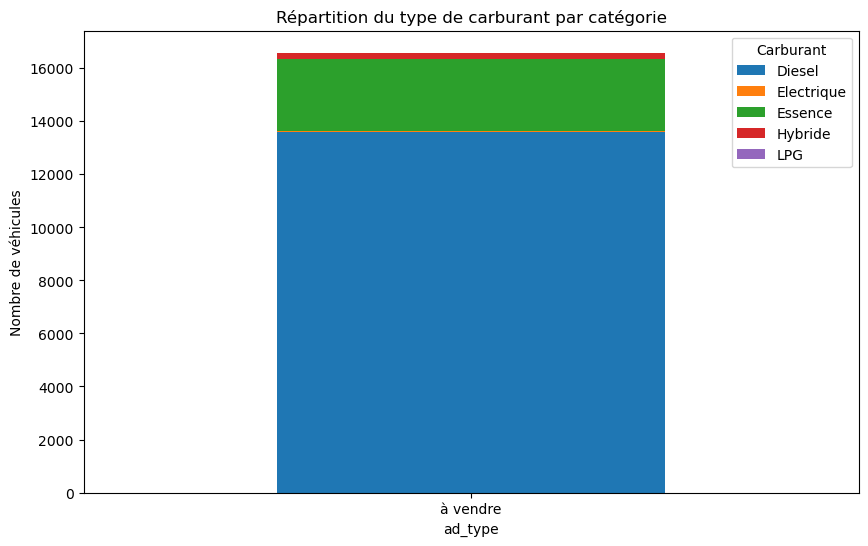

In [13]:
occasions = df[df['ad_type'] == 'à vendre']  # Voitures d'occasion
locations = df[df['ad_type'] == 'à louer']   
# Compter les occurrences
fuel_counts = df.groupby(['ad_type', 'fuel_type']).size().unstack()

# Afficher un barplot empilé
fuel_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition du type de carburant par catégorie')
plt.ylabel('Nombre de véhicules')
plt.xticks(rotation=0)
plt.legend(title='Carburant')
plt.show()

In [14]:
# Supposons que votre dataframe s'appelle df
df = df[df['ad_type'] != "à louer"]

# Réinitialiser l'index si nécessaire
df = df.reset_index(drop=True)

In [36]:
df.head(100)

,id,list_id,title,description,price,location,ad_type,category,phone,seller_name,seller_type,seller_verified,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,75007294,55835159,Mercedes-Benz Classe CLA Diesel Automatique 2025,mercedes CLA 220 DIESEL voiture toute option p...,NaN,Rabat,à vendre,Voitures d'occasion,666187046.0,Marjane Auto,shop,False,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
1,75020424,55845764,KIFAL - VOLKSWAGEN Touareg,Référence Kifal : #VEH0000VMI\nKIFAL AUTO s'oc...,365000.0,Casablanca,à vendre,Voitures d'occasion,703117060.0,KIFAL AUTO,shop,False,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
2,75381400,56140161,opel corsa,•avito / moteur.ma vous proposer :\n\n•opel - ...,198000.0,Casablanca,à vendre,Voitures d'occasion,777432421.0,Voitures particuliers certifiées,shop,True,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
3,75397289,56153271,Megane 3 coupé 1.9,Voiture trai bon etat toute option 1.9,79000.0,Casablanca,à vendre,Voitures d'occasion,661664461.0,LAVAGE AUTO SAAD,shop,False,"Voitures d'occasion, à vendre",170 000 - 179 999,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
4,74273744,55274208,Fiat 500 diesel,Voiture très bon état,93000.0,Casablanca,à vendre,Voitures d'occasion,661664461.0,LAVAGE AUTO SAAD,shop,False,"Voitures d'occasion, à vendre",75 000 - 79 999,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,75561637,56287969,Audi A4 35 TDI premium plus,Je vends ma voiture audi A4 35 TDI S-tronic pr...,NaN,Casablanca,à vendre,Voitures d'occasion,603126577.0,Achraf,private,False,"Voitures d'occasion, à vendre",25 000 - 29 999,Audi,A4,5.0,WW au Maroc,8 CV,Excellent,2023,Automatique,Diesel
96,75505971,56241149,PEUGEOT 208 (Active Pack) 11/2022 à Tanger,PEUGEOT 208 1.6 HDi 92ch Active Pack Model 11/...,153000.0,Tanger,à vendre,Voitures d'occasion,681458519.0,AUTO AL-QUDS,shop,False,"Voitures d'occasion, à vendre",65 000 - 69 999,Peugeot,208,5.0,WW au Maroc,6 CV,Excellent,2022,Manuelle,Diesel
97,62849009,47731149,Touareg pak élégance New modèle 1er main,Bonjour une volkswagen touareg 245 ch v6 Dies...,349000.0,Casablanca,à vendre,Voitures d'occasion,606132602.0,Mohamed,private,False,"Voitures d'occasion, à vendre",110 000 - 119 999,Volkswagen,Touareg,5.0,WW au Maroc,12 CV,Excellent,2020,Automatique,Diesel
98,75429060,56179226,Dacia Logan Diesel Manuelle 2014 à Agadir,Voiture on bon état \nDisponible a boutique \n...,87000.0,Agadir,à vendre,Voitures d'occasion,677963624.0,Med,shop,False,"Voitures d'occasion, à vendre",190 000 - 199 999,Dacia,Logan,5.0,WW au Maroc,6 CV,Bon,2014,Manuelle,Diesel


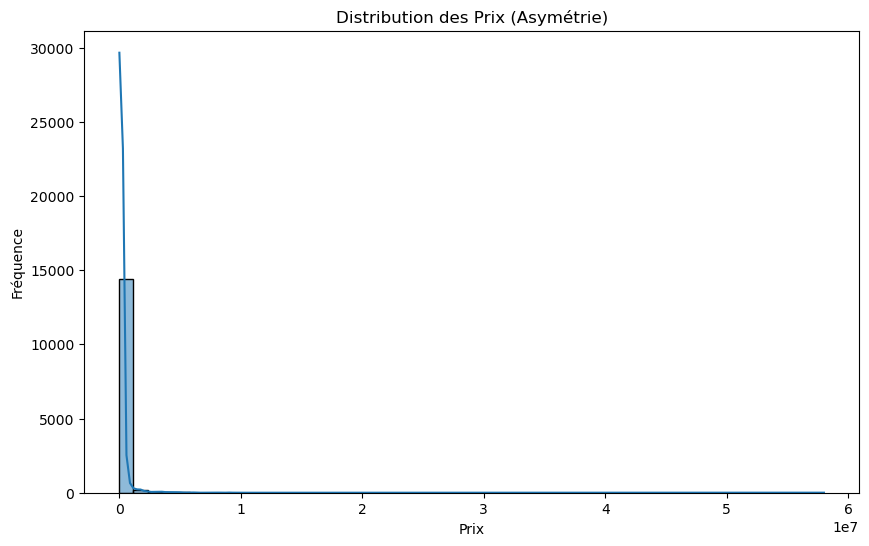

In [34]:
price_data = df['price'].dropna()

# Afficher l'histogramme + courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(price_data, kde=True, bins=50)
plt.title("Distribution des Prix (Asymétrie)")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

C:\Users\Client\AppData\Local\Temp\ipykernel_4164\333617235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mileage'] = df_clean['mileage'].astype(str).str.replace(r'\D+', '', regex=True).astype(float)


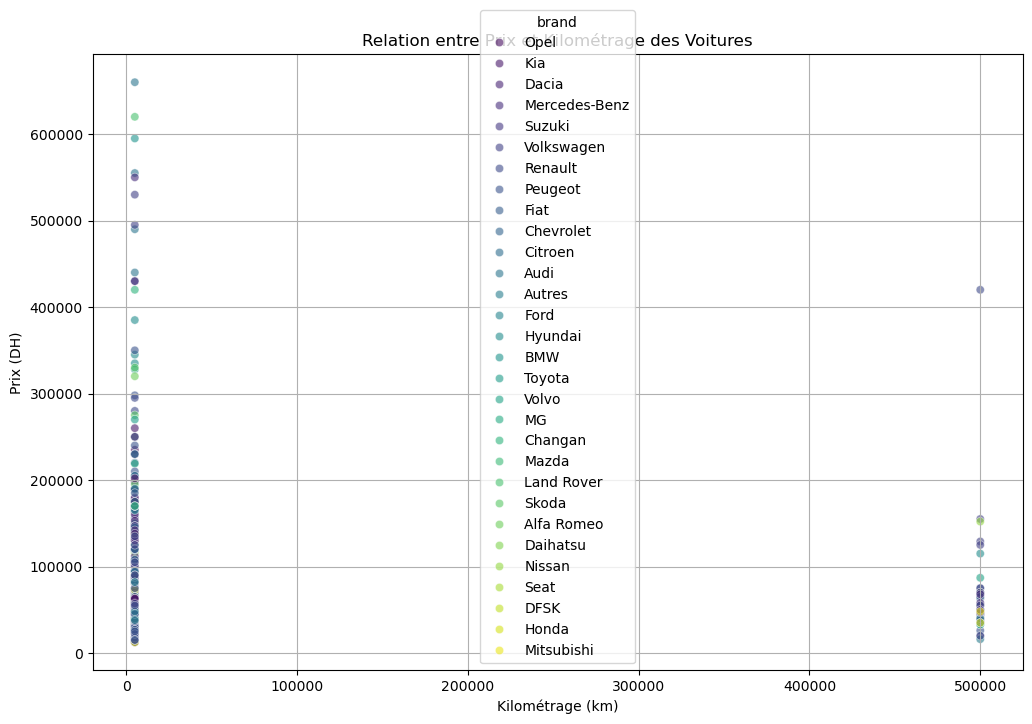

In [40]:
# Supprimer les lignes où 'price' ou 'mileage' sont manquants ou aberrants
df_clean = df.dropna(subset=['price', 'mileage'])

# Convertir 'mileage' en numérique (supprimer les unités comme "km" si nécessaire)
df_clean['mileage'] = df_clean['mileage'].astype(str).str.replace(r'\D+', '', regex=True).astype(float)

# Filtrer les outliers (ex: prix > 99e percentile, kilométrage > 500 000 km)
df_clean = df_clean[
    (df_clean['price'] <= df_clean['price'].quantile(0.99)) &
    (df_clean['mileage'] <= 500000)
]
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='mileage',
    y='price',
    hue='brand',  # Optionnel: colorer par marque
    alpha=0.6,
    palette='viridis'
)
plt.title("Relation entre Prix et Kilométrage des Voitures")
plt.xlabel("Kilométrage (km)")
plt.ylabel("Prix (DH)")
plt.grid(True)

# Ajuster l'échelle si nécessaire (logarithmique pour les prix élevés)
# plt.yscale('log')  # Décommentez si les prix sont très étendus

plt.show()